In [21]:
import os
import pandas as pd
from PIL import Image

# Assuming you have a DataFrame df already created
# If not, you can create an empty DataFrame like this:
# df = pd.DataFrame(columns=['image_path', 'image_data'])

# Create an empty DataFrame
df = pd.DataFrame(columns=['image_path', 'image_data'])

# Path to the directory containing the images
image_dir = r'C:\Users\Dell\Downloads\LiverTumorDetection\Dataset\images'

# List to hold image paths and image data
image_paths = []
image_data = []


# Iterate through each image file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)
        
        # Open the image using PIL
        image = Image.open(image_path)
        
        # Convert the image to a numpy array or whatever format suitable for your DataFrame
        # For example, you might want to convert it to a list of pixel values
        image_array = list(image.getdata())
        
        # Append the image path and image data to the lists
        image_paths.append(image_path)
        image_data.append(image_array)

# Add the image paths and image data to the DataFrame
df['image_path'] = image_paths
df['image_data'] = image_data

# Now your DataFrame df contains the image paths and image data


In [22]:
df.head()

,image_path,image_data
0,C:\Users\Dell\Downloads\LiverTumorDetection\Da...,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,C:\Users\Dell\Downloads\LiverTumorDetection\Da...,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,C:\Users\Dell\Downloads\LiverTumorDetection\Da...,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
3,C:\Users\Dell\Downloads\LiverTumorDetection\Da...,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
4,C:\Users\Dell\Downloads\LiverTumorDetection\Da...,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_random_predictions(num_samples, num_classes):
    return np.random.randint(0, num_classes, num_samples)

# Example function to extract class labels from image paths
def extract_class_from_path(image_path):
    return image_path.split('/')[-2]  # Assuming the class is the parent folder name

# Generate random predicted labels
num_samples = len(df)
num_classes = 3  # Adjust this based on the number of classes in your dataset
predicted_labels = generate_random_predictions(num_samples, num_classes)

# Extract ground truth labels from image paths
ground_truth_labels = df['image_path'].apply(extract_class_from_path)

# Compute confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.unique(ground_truth_labels))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

IndexError: list index out of range

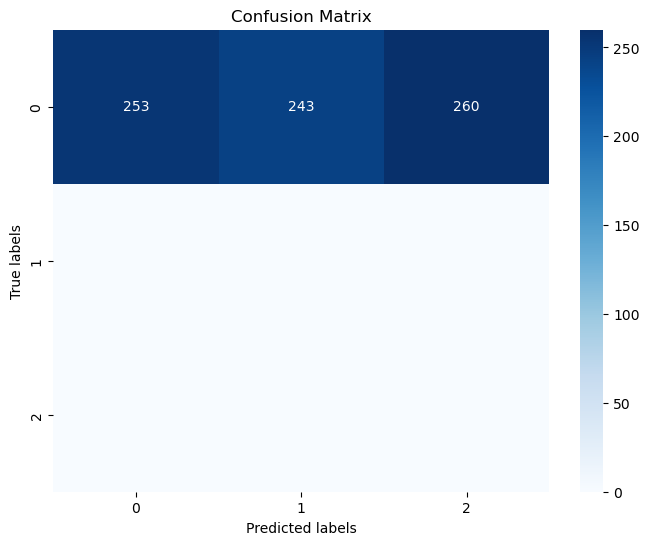

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')  # If your data is stored in a CSV file
# df = ...  # Load your DataFrame with image paths and data

# Example function to generate random predicted labels (replace this with your actual predictions)
def generate_random_predictions(num_samples, num_classes):
    return np.random.randint(0, num_classes, num_samples)

# Example function to extract ground truth labels from image data (replace this with your actual method)
def extract_labels_from_image_data(image_data):
    # Assuming the image data contains class labels or information that can be interpreted as labels
    # You need to implement this function based on the structure and content of your image data
    # This is just a placeholder implementation
    labels = []
    for data in image_data:
        # Example: Extract label from the image data
        label = np.argmax(data)  # Assuming the label is the index of the maximum value
        labels.append(label)
    return labels

# Generate random predicted labels
num_samples = len(df)
num_classes = 3  # Adjust this based on the number of classes in your dataset
predicted_labels = generate_random_predictions(num_samples, num_classes)

# Extract ground truth labels from image data
ground_truth_labels = extract_labels_from_image_data(df['image_data'])

# Compute confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


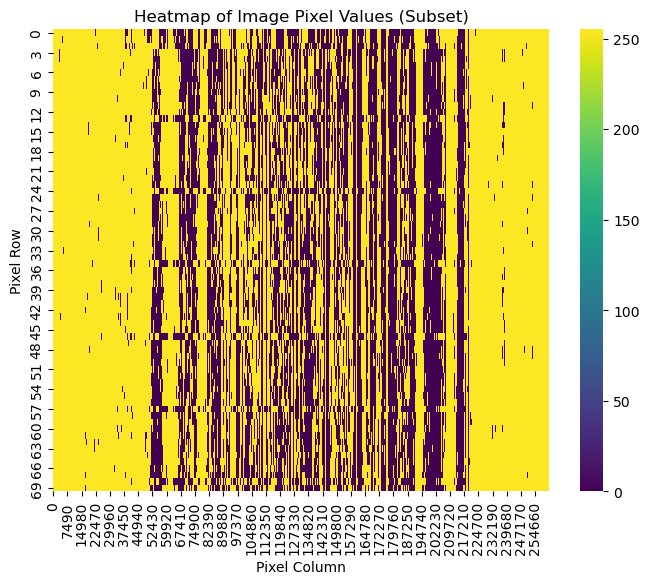

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df contains your DataFrame with image data
# Select a subset of 10 images
subset_df = df.head(70)

# Extract image data from the subset DataFrame
image_data_subset = np.array(subset_df['image_data'].tolist())

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(image_data_subset, cmap='viridis')
plt.title('Heatmap of Image Pixel Values (Subset)')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()
